In [1]:
import tensorflow as tf

In [68]:
import pandas as pd

In [2]:
tf.__version__
#tf.keras.__version__

'2.3.0'

In [14]:
variable = tf.Variable([3,3])
if tf.test.is_gpu_available():
    print('GPU')
    print('GPU#0?')
    print(var.device.endswith('GPU:0'))
else:
    print("CPU")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
CPU


In [27]:
initial = tf.random.normal(shape=(2,2))
a = tf.Variable(initial)
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.4391574 , -0.53739125],
       [ 0.34267804, -1.4365636 ]], dtype=float32)>

In [22]:
new_val = tf.random.normal(shape=(2,2))
a.assign(new_val)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[-2.2676117, -0.7068052],
       [ 0.4954586,  1.1365764]], dtype=float32)>

In [31]:
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-2.481707  , -0.40771738],
       [ 1.0954083 ,  1.293826  ]], dtype=float32)>

In [30]:
new = tf.random.normal(shape=(2,2))
a.assign_add(new)

<tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[-2.481707  , -0.40771738],
       [ 1.0954083 ,  1.293826  ]], dtype=float32)>

In [33]:
b = tf.Variable(24)

In [34]:
b

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=24>

In [35]:
c = tf.Variable(26)

In [36]:
c.assign_add(b)

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=50>

### KERAS 

In [8]:
mnist_data = tf.keras.datasets.mnist

In [4]:
mnist_data

<module 'tensorflow.keras.datasets.mnist' from 'c:\\users\\jalebi2\\anaconda3\\envs\\tf2\\lib\\site-packages\\tensorflow\\keras\\datasets\\mnist\\__init__.py'>

In [9]:
mnist_data.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [46]:
(train_x,train_y),(test_x,test_y) = mnist_data.load_data()

### Declaring Variable

In [11]:
epocs = 10
batch = 30

In [47]:
train_x,test_x= tf.cast(train_x/255.0,tf.float32),tf.cast(test_x/255.0,tf.float32)
train_y,test_y = tf.cast(train_y,tf.int64),tf.cast(test_y,tf.int64)

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
tf.shape(train_x)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([60000,    28,    28])>

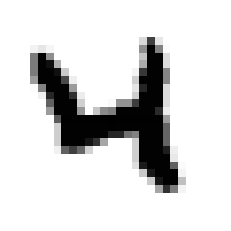

In [14]:
#Lets view the first datapoint of train data
plt.imshow(train_x[20], cmap = "binary")
plt.axis('off')
plt.show()

<AxesSubplot:>

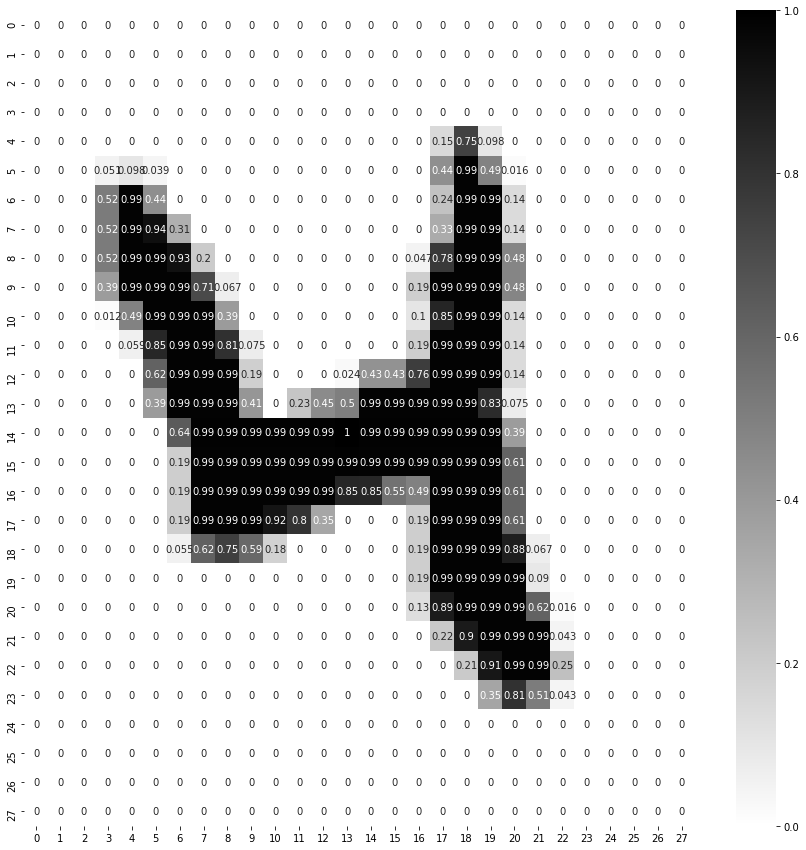

In [18]:
plt.figure(figsize = (15,15))
sns.heatmap(train_x[20], annot = True, cmap = "binary")

### Building the architecture

In [51]:
layer = [(tf.keras.layers.Flatten(input_shape=[28,28],name = "input_layer")),
        (tf.keras.layers.Dense(512,activation = "relu",name = "Hidden_Layer1")),
         (tf.keras.layers.Dense(365,activation = "relu",name = "Hidden_layer2")),
         (tf.keras.layers.Dropout(0.2,name = "Dropout")),
         (tf.keras.layers.Dense(512,activation = "softmax",name = "output_layer"))
         ]

In [52]:
mistmodel = tf.keras.models.Sequential(layer)

#### Alternative1

In [19]:
mistmodel = tf.keras.models.Sequential([
    #flatening the N dimension array in M*1 matrix that will be input in batch size of 32
    tf.keras.layers.Flatten(),
    #intialising hidden layer with 512 neurons and taking relu as activation function
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(365,activation=tf.nn.leaky_relu),
    #selecting 80% of neurons in each epocs
    tf.keras.layers.Dropout(0.2),
    #intializing output layer that have 10 labels as o/p so 10 neurons will be there
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


In [37]:
mistmodel.layers

### Compiling the model

In [53]:
optimiser = tf.keras.optimizers.Adam()
mistmodel.compile(optimizer = optimiser,loss = "sparse_categorical_crossentropy",metrics = ["accuracy"])

### Fitting the model

In [78]:
t1 = mistmodel.fit(train_x,train_y,epochs = 10,batch_size = 32)

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0124 - accuracy: 0.9967
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0124 - accuracy: 0.9968
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0151 - accuracy: 0.9962
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0116 - accuracy: 0.9969
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0121 - accuracy: 0.9974
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0118 - accuracy: 0.9972
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0142 - accuracy: 0.9968
Epoch 8/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0119 - accuracy: 0.9971
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0109 - accuracy: 0.9973
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

In [55]:
mistmodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer1 (Dense)        (None, 512)               401920    
_________________________________________________________________
Hidden_layer2 (Dense)        (None, 365)               187245    
_________________________________________________________________
Dropout (Dropout)            (None, 365)               0         
_________________________________________________________________
output_layer (Dense)         (None, 512)               187392    
Total params: 776,557
Trainable params: 776,557
Non-trainable params: 0
_________________________________________________________________


### Evaluate the model

In [49]:
mistmodel.evaluate(test_x,test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.1045 - accuracy: 0.9795


[0.10451905429363251, 0.9794999957084656]

In [66]:
t1.params

{'verbose': 1, 'epochs': 10, 'steps': 1875}

In [71]:
pd.DataFrame(t1.history)

,loss,accuracy
0,0.019405,0.994150
1,0.018580,0.994883
2,0.017222,0.994800
3,0.017676,0.994617
4,0.016781,0.995117
5,0.013922,0.996383
6,0.012668,0.996200
7,0.018733,0.995433
8,0.015480,0.995900
9,0.013633,0.996617


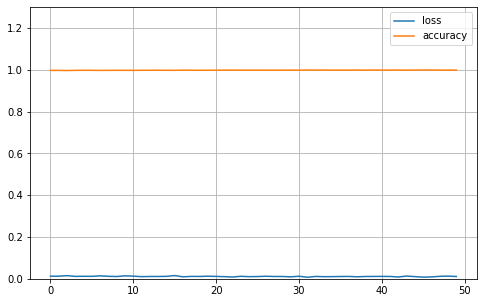

In [79]:
pd.DataFrame(t1.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1.3)
plt.show()

### Saving the model

In [61]:
import os

In [62]:
os.chdir('F:/Sandeep/SANDEEP DOCS/DLCVNLP')

In [63]:
unique_path = mistmodel.save('model.h5')

#### Reading an jpeg image and checking prediction of our image by using pretrained model

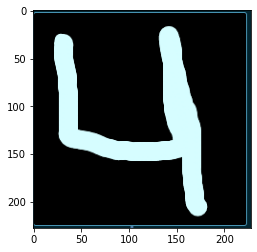

In [122]:
# importing matplotlib modules 
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
  
# Read Images 
img = mpimg.imread('four.png') 
  
# Output Images 
plt.imshow(img) 

In [ ]:
#### Converting rgb to gray

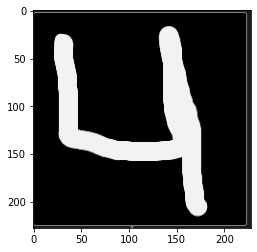

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = mpimg.imread('Four.png')     
gray = rgb2gray(img)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.show()

In [121]:
img.shape

(228, 228, 4)

In [123]:
gray.shape

(228, 228)

In [87]:
img

array([[[0.02352941, 0.05098039, 0.05882353, 1.        ],
        [0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 1.        ],
        ...,
        [0.00784314, 0.14117648, 0.18431373, 1.        ],
        [0.00784314, 0.14117648, 0.18431373, 1.        ],
        [0.00784314, 0.14117648, 0.18431373, 1.        ]],

       [[0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 1.        ],
        ...,
        [0.00784314, 0.14117648, 0.18431373, 1.        ],
        [0.00784314, 0.14117648, 0.18431373, 1.        ],
        [0.00784314, 0.14117648, 0.18431373, 1.        ]],

       [[0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 1.        ],
        [0.        , 0.        , 0.        , 1.        ],
        ...,
        [0.00784314, 0.14117648, 0.18431373, 1.        ],
        [0.00784314, 0.141176

In [124]:
#Resizing the input data of gray image as it is shape(224,225) but input for our model was (28,28)
import cv2
gray = cv2.resize(gray,(28,28))

In [125]:
gray.shape

(28, 28)

In [126]:
gray

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.2959109 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.34809021],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.3924

In [127]:
X_new = test_x[:1]

In [128]:
X_new.shape

TensorShape([1, 28, 28])

In [129]:
gray = gray.reshape(1,28,28)

In [130]:
y_pred = np.argmax(mistmodel.predict(gray), axis=-1)
y_pred

array([4], dtype=int64)